<h1>Banco de Dados - A2</h1>
<h3>Fundação Getúlio Vargas - Escola de Matemática Aplicada </br>
Bacharelado em Ciência de Dados </br>
Disciplina: Banco de Dados </br>
Professor: Renato Rocha Souza</br>
Alunos: Gianlucca Devigili e Maisa O. Fraiz</h3>

In [1]:
import sqlalchemy as sql
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import chart_studio.plotly as plotly
import plotly.graph_objects as go
from networkx_viewer import Viewer
import nx_altair as nxa
from pyvis.network import Network
import pymysql

## Importando os Dados:
Utilizamos a biblioteca pymsql para importar os dados do dataser: ()

In [27]:
conn = pymysql.connect(host='localhost', port=3306, user='root', passwd = "root")
cur = conn.cursor()
cur.execute("use marveldb")
df_nodes = pd.read_sql("SELECT * FROM heroes;", conn)
df_edges = pd.read_sql("SELECT * FROM edges;", conn)

In [28]:
df_nodes.head()

Id                    Label
0   Black Panther / T'chal   Black Panther / T'chal
1         Loki [asgardian]         Loki [asgardian]
2     Richards, Franklin B        Mantis / ? Brandt
3    Iceman / Robert Bobby    Iceman / Robert Bobby
4  Marvel Girl / Jean Grey  Marvel Girl / Jean Grey

In [29]:
df_edges.head()

Source                   Target  Weight
0  Black Panther / T'chal         Loki [asgardian]      10
1  Black Panther / T'chal        Mantis / ? Brandt      23
2  Black Panther / T'chal    Iceman / Robert Bobby      12
3  Black Panther / T'chal  Marvel Girl / Jean Grey      10
4  Black Panther / T'chal   Cyclops / Scott Summer      14

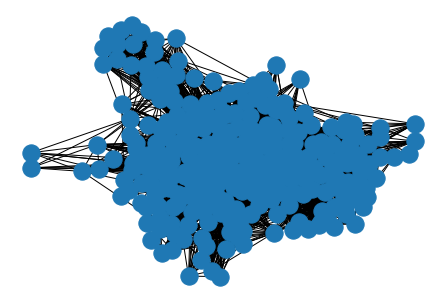

In [5]:
G = nx.Graph()
#Adiciona os nós
for i, r in df_nodes.iterrows():
    G.add_node(r["Id"])

#Faz uma tupla com as arestas
edges_tuple = [(r["Source"], r["Target"]) for i, r in df_edges.iterrows()]
G.add_edges_from(edges_tuple)
nx.draw(G)

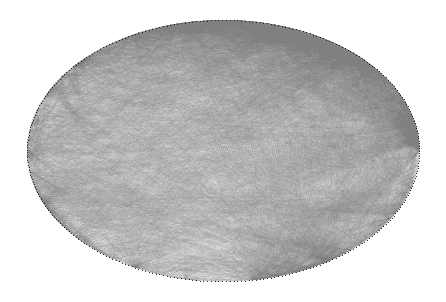

In [6]:
options = {
    "node_color": "black",
    "node_size": 1,
    "edge_color": "gray",
    "linewidths": 0,
    "width": 0.04,
}
nx.draw_circular(G, **options)

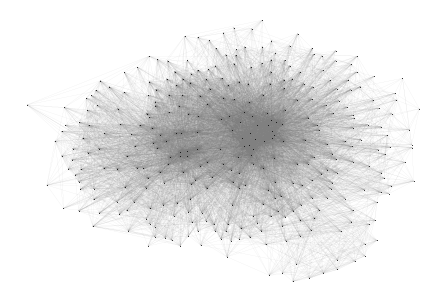

In [7]:
nx.draw_kamada_kawai(G, **options)

In [30]:
#Cria o grafo usando pyvis
marvel_net = Network(height="1250px", width="100%", bgcolor="#ffffff", font_color="black")
marvel_net.barnes_hut()

#Popula o grafo com nós e peso
sources = df_edges['Source']
targets = df_edges['Target']
weights = df_edges['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    
    marvel_net.add_node(src, src, title=src)
    marvel_net.add_node(dst, dst, title=dst)
    marvel_net.add_edge(src, dst, value=w)

neighbor_map = marvel_net.get_adj_list()

for node in marvel_net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

#Personilização do grafo
marvel_net.toggle_physics(True)
marvel_net.set_options(''' var options = {
  "nodes": {
    "font": {
      "size": 20,
      "face": "tahoma",
      "strokeWidth": 3
    },
    "shapeProperties": {
      "borderDashes": false
    }
  },
  "edges": {
    "color": {
      "inherit": true
    },
    "font": {
      "face": "tahoma"
    },
    "smooth": false
  },
  "interaction": {
    "hover": true,
    "keyboard": {
      "enabled": true
    },
    "multiselect": true,
    "navigationButtons": true
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -85550,
      "centralGravity": 0.2,
      "springLength": 250,
      "springConstant": 0.001
    },
    "minVelocity": 0.75,
    "timestep": 0.2
  }
}
''')

#Gerando o html
marvel_net.show("marvel.html")


In [32]:
query = """
SELECT Source, Target, Weight
FROM edges 
WHERE Source IN ('Mr. Fantastic / Reed R', 'Invisible Woman / Sue', 'Thing / Benjamin J. Gr', 'Human Torch /  JohnnyS')
"""
df_edges = pd.read_sql(query, conn)
df_edges.head()
#IN ('Mr. Fantastic / Reed R', 'Invisible Woman / Sue', 'Thing / Benjamin J. Gr', 'Human Torch /  JohnnyS')

Source                  Target  Weight
0   Invisible Woman / Sue  Black Panther / T'chal      39
1  Thing / Benjamin J. Gr  Black Panther / T'chal      49
2  Thing / Benjamin J. Gr   Iron Man / Tony Stark     129
3   Invisible Woman / Sue   Iron Man / Tony Stark     114
4  Thing / Benjamin J. Gr  Iron Man Iv / James R.      14

In [33]:
#Cria o grafo usando pyvis
marvel_net = Network(height="1250px", width="100%", bgcolor="#ffffff", font_color="black")
marvel_net.barnes_hut()

#Popula o grafo com nós e peso
sources = df_edges['Source']
targets = df_edges['Target']
weights = df_edges['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    
    marvel_net.add_node(src, src, title=src)
    marvel_net.add_node(dst, dst, title=dst)
    marvel_net.add_edge(src, dst, value=w)

neighbor_map = marvel_net.get_adj_list()

for node in marvel_net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

#Personilização do grafo
marvel_net.toggle_physics(True)
marvel_net.set_options(''' var options = {
  "nodes": {
    "font": {
      "size": 20,
      "face": "tahoma",
      "strokeWidth": 3
    },
    "shapeProperties": {
      "borderDashes": false
    }
  },
  "edges": {
    "color": {
      "inherit": true
    },
    "font": {
      "face": "tahoma"
    },
    "smooth": false
  },
  "interaction": {
    "hover": true,
    "keyboard": {
      "enabled": true
    },
    "multiselect": true,
    "navigationButtons": true
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -85550,
      "centralGravity": 0.2,
      "springLength": 250,
      "springConstant": 0.001
    },
    "minVelocity": 0.75,
    "timestep": 0.2
  }
}
''')

#Gerando o html
marvel_net.show("fantastic4.html")


In [34]:
query = """
SELECT Source, Target, Weight
FROM edges
WHERE Source IN ('Captain America', 'Iron Man / Tony Stark', 'Hulk / Dr. Robert Bruce Banner', 'Black Widow / Natasha', 'Thor / Dr. Donald Blak')
"""
df_edges = pd.read_sql(query, conn)
df_edges

Source                  Target  Weight
0    Hulk / Dr. Robert Bruce Banner  Black Panther / T'chal      27
1             Iron Man / Tony Stark  Black Panther / T'chal     120
2                   Captain America  Black Panther / T'chal     131
3            Thor / Dr. Donald Blak  Black Panther / T'chal     103
4             Black Widow / Natasha  Black Panther / T'chal      44
..                              ...                     ...     ...
492           Black Widow / Natasha  Rage / Elvin Daryl Hal      21
493           Black Widow / Natasha  Binary / Carol Danvers      24
494           Black Widow / Natasha     Fury, Col. Nicholas      37
495           Black Widow / Natasha  Collector / Taneleer T      10
496           Black Widow / Natasha  Captain Marvel / Capta      10

[497 rows x 3 columns]

In [35]:
#Cria o grafo usando pyvis
marvel_net = Network(height="1250px", width="100%", bgcolor="#ffffff", font_color="black")
marvel_net.barnes_hut()

#Popula o grafo com nós e peso
sources = df_edges['Source']
targets = df_edges['Target']
weights = df_edges['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    
    marvel_net.add_node(src, src, title=src)
    marvel_net.add_node(dst, dst, title=dst)
    marvel_net.add_edge(src, dst, value=w)

neighbor_map = marvel_net.get_adj_list()

for node in marvel_net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

#Personilização do grafo
marvel_net.toggle_physics(True)
marvel_net.set_options(''' var options = {
  "nodes": {
    "font": {
      "size": 20,
      "face": "tahoma",
      "strokeWidth": 3
    },
    "shapeProperties": {
      "borderDashes": false
    }
  },
  "edges": {
    "color": {
      "inherit": true
    },
    "font": {
      "face": "tahoma"
    },
    "smooth": false
  },
  "interaction": {
    "hover": true,
    "keyboard": {
      "enabled": true
    },
    "multiselect": true,
    "navigationButtons": true
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -85550,
      "centralGravity": 0.2,
      "springLength": 250,
      "springConstant": 0.001
    },
    "minVelocity": 0.75,
    "timestep": 0.2
  }
}
''')

#Gerando o html
marvel_net.show("avengers.html")


In [36]:
query = """
SELECT Source, Target, Weight
FROM edges
WHERE Source = 'Professor X / Charles'
"""
df_edges = pd.read_sql(query, conn)
df_edges.head()

Source                  Target  Weight
0  Professor X / Charles  Black Panther / T'chal       9
1  Professor X / Charles    Blob / Fred J. Dukes      27
2  Professor X / Charles  Pyro / Allerdyce Johnn       7
3  Professor X / Charles               Rogue  /      131
4  Professor X / Charles  Destiny Ii / Irene Adl       8

In [37]:
#Cria o grafo usando pyvis
marvel_net = Network(height="1250px", width="100%", bgcolor="#ffffff", font_color="black")
marvel_net.barnes_hut()

#Popula o grafo com nós e peso
sources = df_edges['Source']
targets = df_edges['Target']
weights = df_edges['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    
    marvel_net.add_node(src, src, title=src)
    marvel_net.add_node(dst, dst, title=dst)
    marvel_net.add_edge(src, dst, value=w)

neighbor_map = marvel_net.get_adj_list()

for node in marvel_net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

#Personilização do grafo
marvel_net.toggle_physics(True)
marvel_net.set_options(''' var options = {
  "nodes": {
    "font": {
      "size": 20,
      "face": "tahoma",
      "strokeWidth": 3
    },
    "shapeProperties": {
      "borderDashes": false
    }
  },
  "edges": {
    "color": {
      "inherit": true
    },
    "font": {
      "face": "tahoma"
    },
    "smooth": false
  },
  "interaction": {
    "hover": true,
    "keyboard": {
      "enabled": true
    },
    "multiselect": true,
    "navigationButtons": true
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -85550,
      "centralGravity": 0.2,
      "springLength": 250,
      "springConstant": 0.001
    },
    "minVelocity": 0.75,
    "timestep": 0.2
  }
}
''')

#Gerando o html
marvel_net.show("charlesX.html")
